<a href="https://colab.research.google.com/github/michael-0907/tibami/blob/main/kaggle_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression


In [82]:
data = pd.read_csv("/content/sample_data/diabetes_prediction_dataset.csv", encoding="utf-8")

In [6]:
data.info()
data.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [83]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [84]:
for i, col in enumerate(data.columns):
  print(f"{i+1}. col_name: {col}, dtype: {data[col].dtype}, isna: {data[col].isna().any()}, unique_num: {data[col].nunique()}")
  print(data[col].unique())



1. col_name: gender, dtype: object, isna: False, unique_num: 3
['Female' 'Male' 'Other']
2. col_name: age, dtype: float64, isna: False, unique_num: 102
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
3. col_name: hypertension, dtype: int64, isna: False, unique_num: 2
[0 1]
4. col_name: heart_disease, dtype: int64, isna: False, unique_num: 2
[1 0]
5. col_name: smoking_history, dtype: object, isna: False, unique_num: 6
['never' 'No In

In [85]:
display(data["diabetes"].value_counts())
display(data["diabetes"].value_counts(normalize=True))


,count
diabetes,
0,91500
1,8500


,proportion
diabetes,
0,0.915
1,0.085


,count
gender,
Female,58552
Male,41430
Other,18


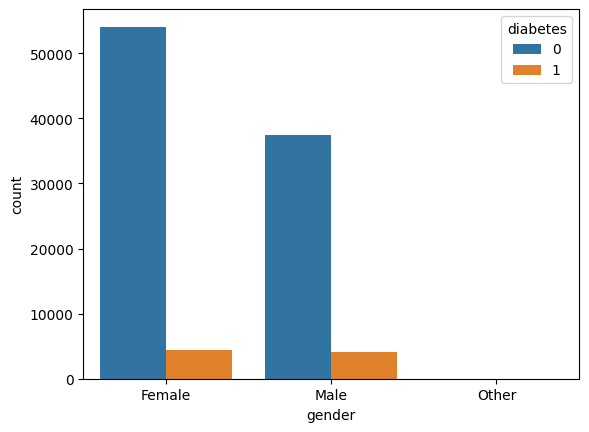

In [86]:
sns.countplot(data=data, x="gender", hue="diabetes")
data["gender"].value_counts()

<Axes: xlabel='hypertension', ylabel='count'>

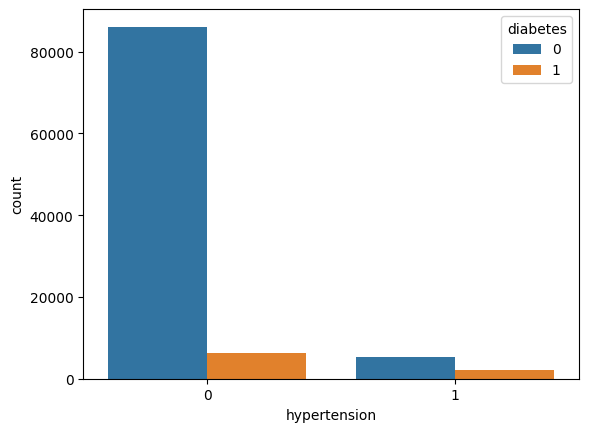

In [87]:
sns.countplot(data=data, x="hypertension", hue="diabetes")


<Axes: xlabel='heart_disease', ylabel='count'>

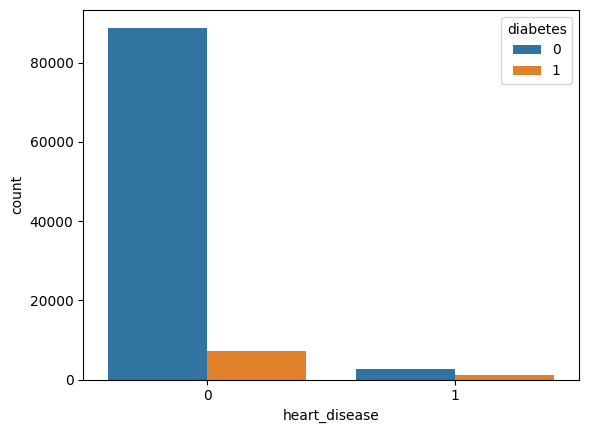

In [88]:
sns.countplot(data=data, x="heart_disease", hue="diabetes")


<Axes: xlabel='smoking_history', ylabel='count'>

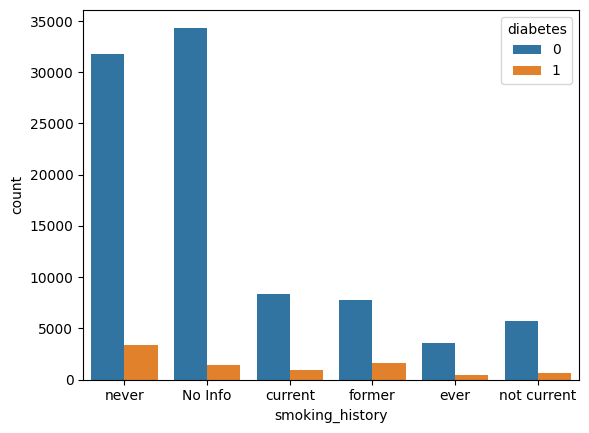

In [47]:
sns.countplot(data=data, x="smoking_history", hue="diabetes")


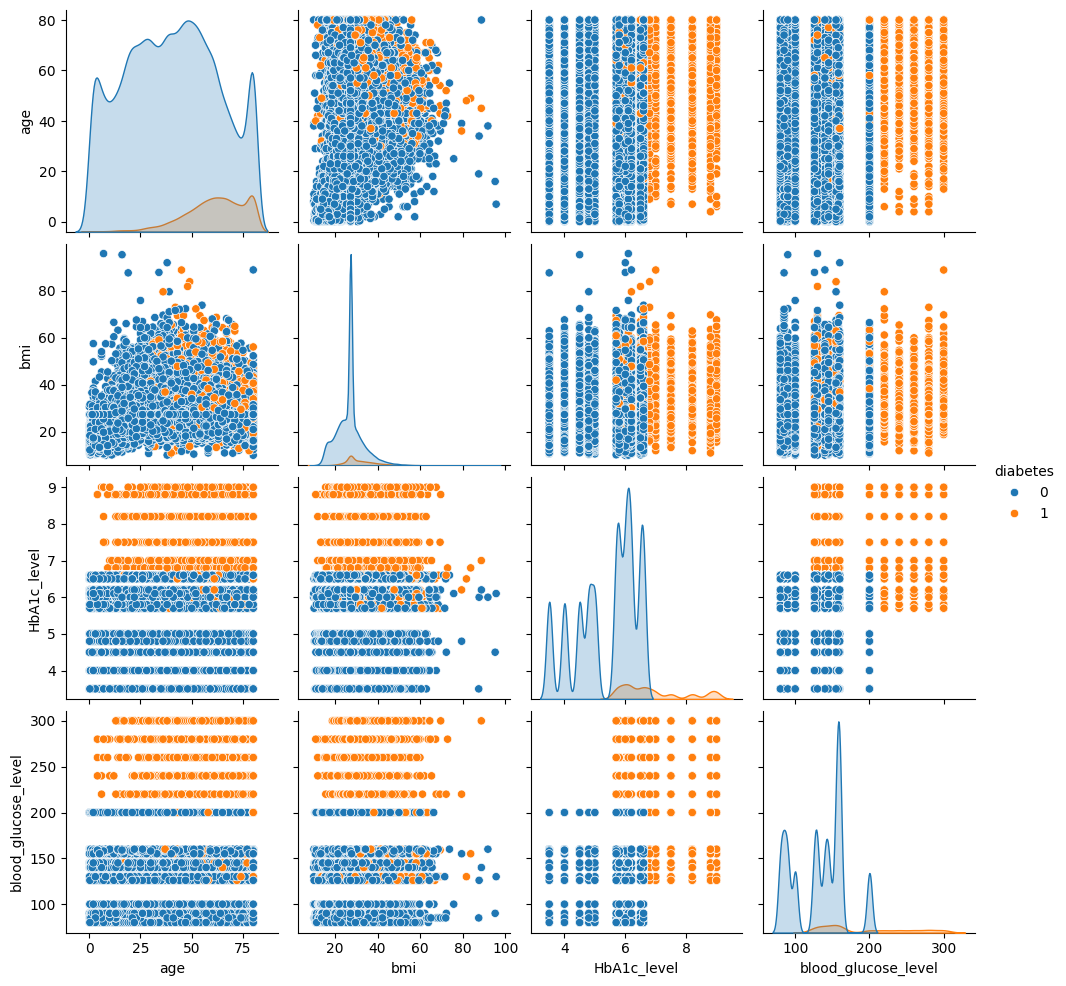

In [80]:
sns.pairplot(data[["age", "bmi", "HbA1c_level", "blood_glucose_level", "diabetes"]], hue="diabetes")

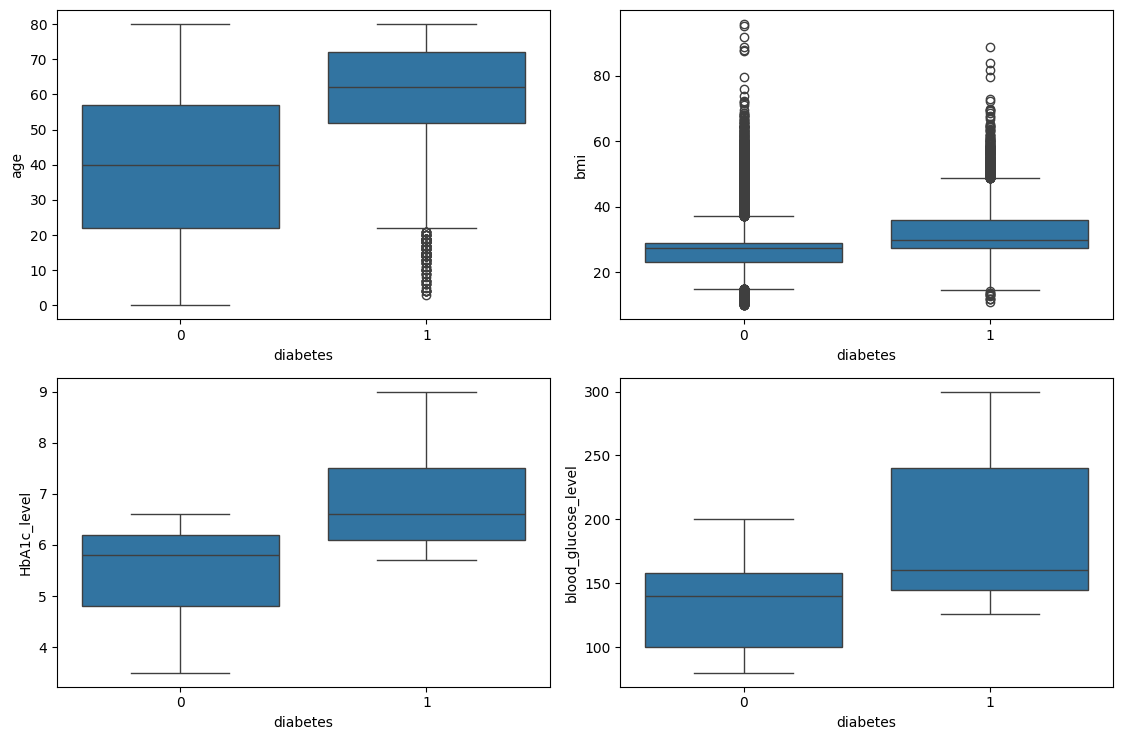

In [89]:
continous = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
fig, axes = plt.subplots(2, 2, figsize=(11.33, 7.5))
axes = axes.flatten()

for i, c in enumerate(continous):
  sns.boxplot(data=data, x="diabetes", y=c, ax=axes[i])
plt.tight_layout()

In [226]:
data[continous].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


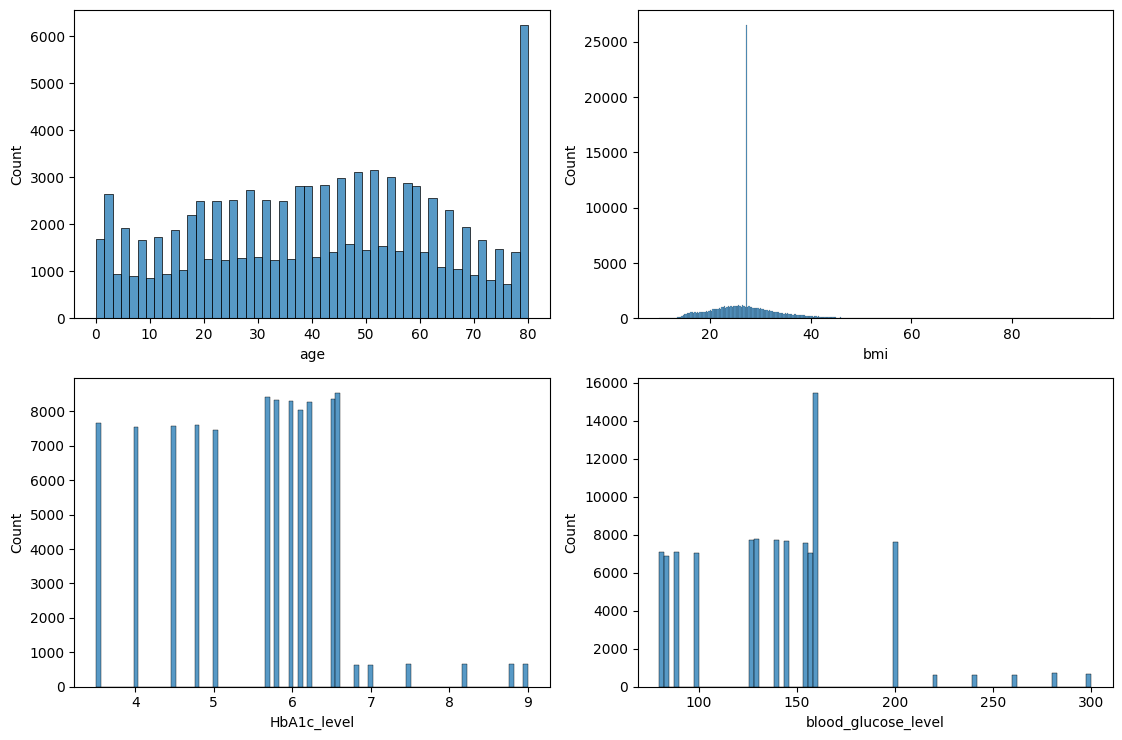

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(11.33, 7.5))
axes = axes.flatten()

for i, c in enumerate(continous):
  sns.histplot(data=data, x=c, ax=axes[i])
plt.tight_layout()

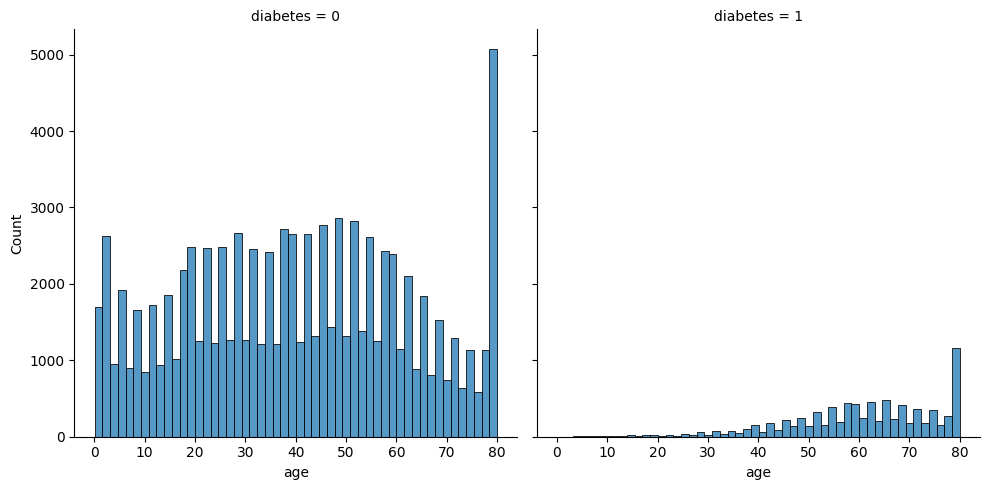

In [18]:
sns.displot(data=data, x="age", kind="hist", col="diabetes")

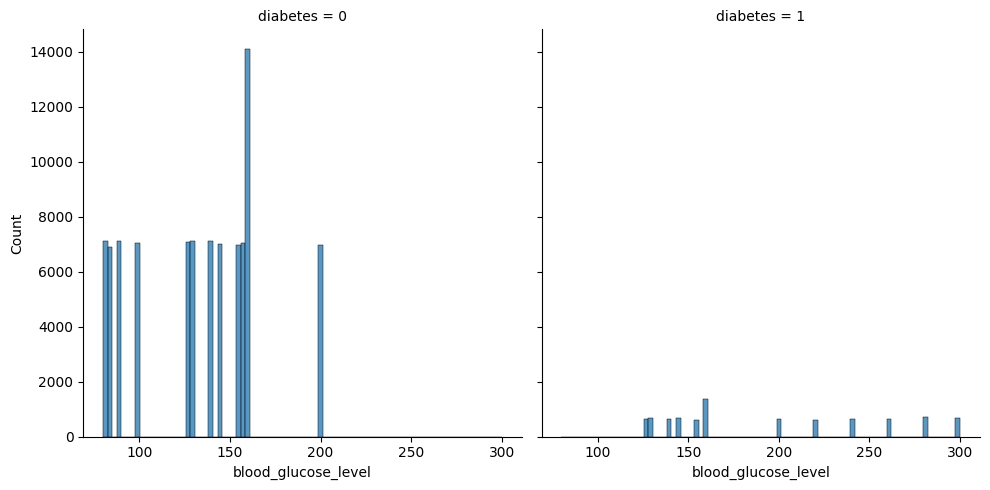

In [91]:
sns.displot(data=data, x="blood_glucose_level", kind="hist", col="diabetes")

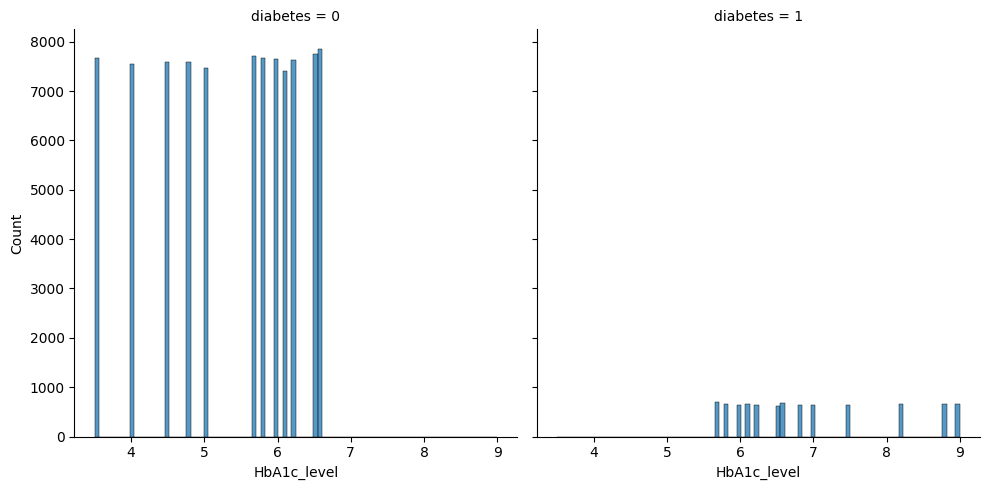

In [73]:
sns.displot(data=data, x="HbA1c_level", kind="hist", col="diabetes")

In [230]:
df = data.copy()
# df = data[data["age"] >= 20].copy()

In [231]:
df["gender"] = df["gender"].map({"Female": 0, "Other": 0, "Male": 1})
df["smoking_history"] = df["smoking_history"].map({'never': 0,  'No Info': 0,
                          'current': 1, 'former': 1, 'ever': 1, 'not current': 1})

Text(0.5, 1.0, 'Feature Correlation Matrix')

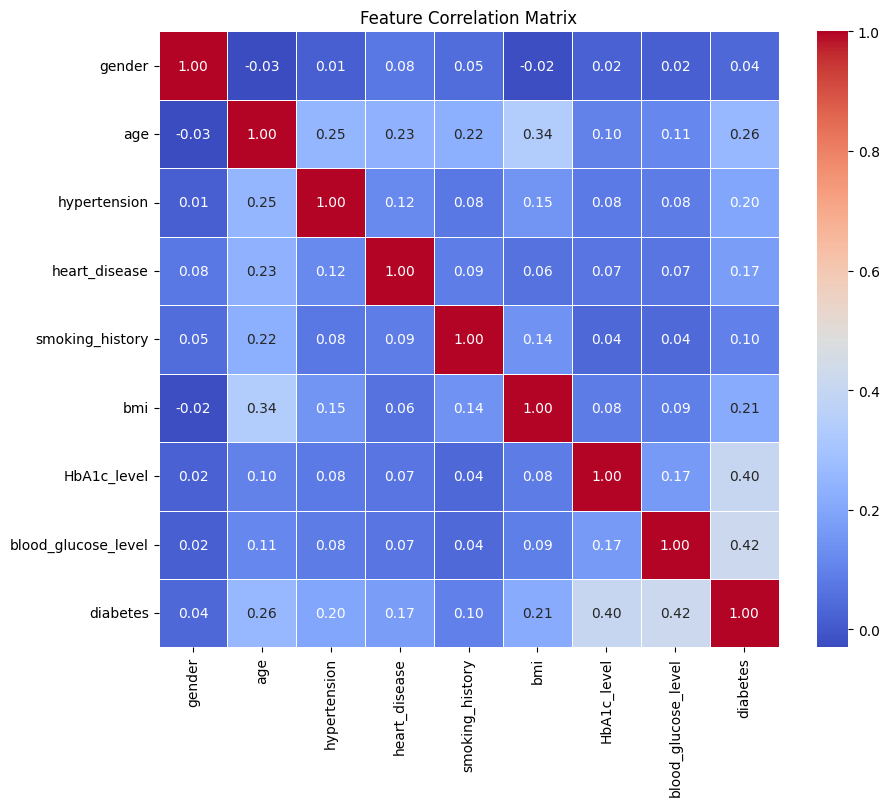

In [232]:
# 計算相關性矩陣
corr_matrix = df.corr()

# 繪製相關性熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")


In [233]:
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80000, 8) (80000,)
(20000, 8) (20000,)


In [235]:
# fil = ["HbA1c_level", "blood_glucose_level", "age"]
model = RandomForestClassifier(n_estimators=120, max_depth=8, min_samples_leaf=5, class_weight="balanced", random_state=42)
# model = LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=5,
                       n_estimators=120, random_state=42)

train accuracy: 0.9625625
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     73200
           1       0.78      0.78      0.78      6800

    accuracy                           0.96     80000
   macro avg       0.88      0.88      0.88     80000
weighted avg       0.96      0.96      0.96     80000

--------------------------------------------------
test accuracy: 0.96115
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.77      0.77      0.77      1700

    accuracy                           0.96     20000
   macro avg       0.88      0.87      0.88     20000
weighted avg       0.96      0.96      0.96     20000



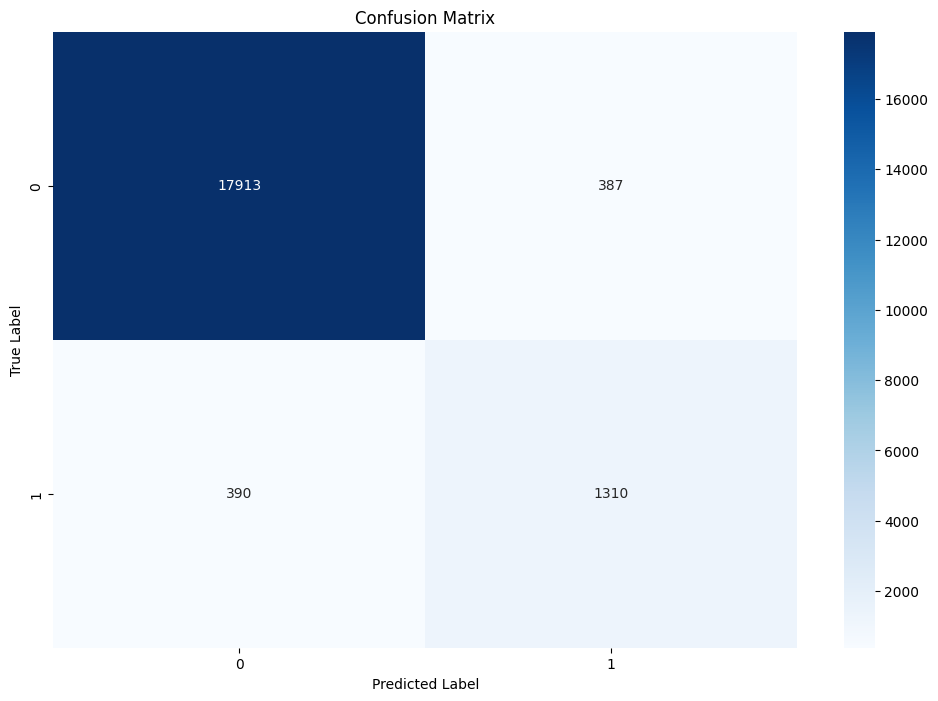

In [238]:
# y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]
threshold = 0.72
y_train_pred = (y_train_proba >= threshold).astype("int")
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
print(f"train accuracy: {train_accuracy}")
print(train_report)

print("-" * 50)
# y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= threshold).astype("int")
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
print(f"test accuracy: {test_accuracy}")
print(test_report)

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

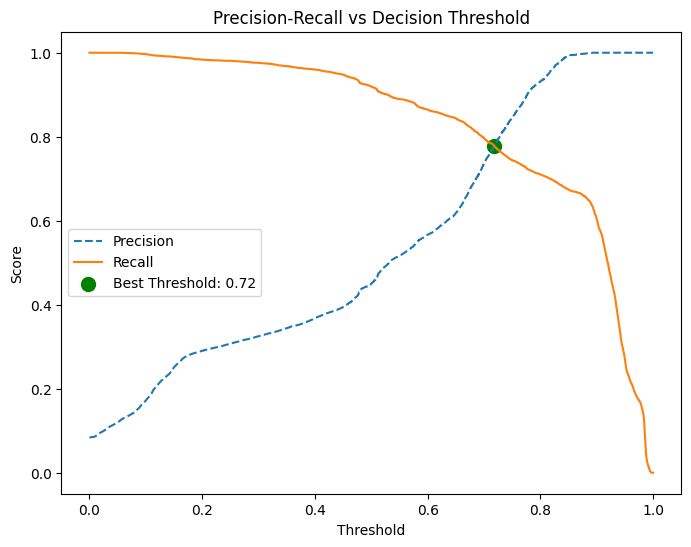

In [237]:
# ijj zmr  Precision-Recall
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_proba)

# 找到 Precision 和 Recall 交叉點(最接近的點)
idx = np.argmin(np.abs(precisions - recalls))
best_threshold = thresholds[idx]

# 畫出 precision, recall 曲線
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recalls[:-1], label="Recall")

# 標記交叉點
plt.scatter([best_threshold], [precisions[idx]], color="green", s=100, label=f"Best Threshold: {best_threshold:.2f}")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Decision Threshold")
plt.show()



In [239]:
feature_importance = model.feature_importances_
sorted_index = np.argsort(feature_importance)[::-1]
sorted_feature = X_train.columns[sorted_index]
sorted_importance = feature_importance[sorted_index]

for i, j in zip(sorted_feature, sorted_importance):
  print(f"{i}: {j}")


HbA1c_level: 0.39053909310758306
blood_glucose_level: 0.3028725799516782
age: 0.1759982833256859
bmi: 0.07378445829461089
hypertension: 0.03102876342604607
heart_disease: 0.01719099998443955
smoking_history: 0.006872428281887192
gender: 0.0017133936280691938


In [241]:
data["diabetes"].value_counts()

,count
diabetes,
0,91500
1,8500


In [260]:
data_diabetes = data[data["diabetes"] == 1].copy()

# def func(value):
#   new_value = (value * 28.7) - 46.7
#   return new_value
# data_diabetes["eag"] = data_diabetes["HbA1c_level"].apply(func)

data_diabetes["eag"] = (data_diabetes["HbA1c_level"] * 28.7) - 46.7
data_diabetes.shape

(8500, 10)

In [261]:
data_diabetes["eag"]

,eag
6,139.85
26,139.85
38,116.89
40,211.60
53,154.20
...,...
99935,188.64
99938,131.24
99957,139.85
99962,154.20


In [262]:
continous = ["age", "bmi", "HbA1c_level", "blood_glucose_level", "eag"]

corr = data_diabetes[continous].corr()

In [263]:
corr

,age,bmi,HbA1c_level,blood_glucose_level,eag
age,1.000000,-0.143890,0.000330,0.014933,0.000330
bmi,-0.143890,1.000000,-0.015921,0.002223,-0.015921
HbA1c_level,0.000330,-0.015921,1.000000,-0.009614,1.000000
blood_glucose_level,0.014933,0.002223,-0.009614,1.000000,-0.009614
eag,0.000330,-0.015921,1.000000,-0.009614,1.000000


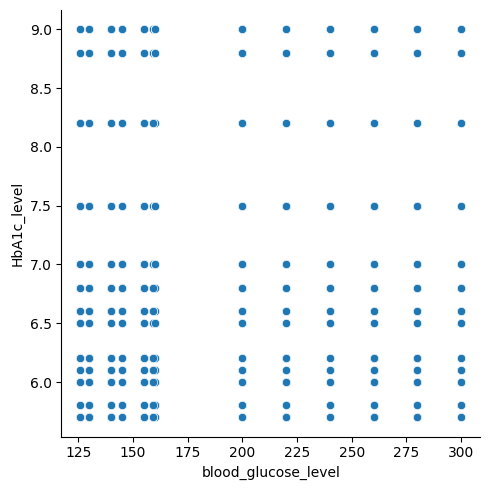

In [264]:
sns.relplot(data=data_diabetes, x="blood_glucose_level", y="HbA1c_level")